<a href="https://colab.research.google.com/github/irissun9602/DeepLearningProject/blob/master/gan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

x = torch.tensor(3.5)
print(x)

tensor(3.5000)


In [ ]:
x = torch.FloatTensor([3.5])

x.type()

'torch.FloatTensor'

In [ ]:
x = torch.cuda.FloatTensor([3.5])

x.type()

In [ ]:
x.device

In [ ]:
y = x*x
y

In [ ]:

size = 600
a = np.random.rand(size, size)
b = np.random.rand(size, size)


aa = torch.cuda.FloatTensor(a)
bb = torch.cuda.FloatTensor(b)

In [ ]:
%%time
cc = torch.matmul(aa, bb)

In [ ]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random

In [ ]:
def generate_real():
  real_data = torch.FloatTensor(
      [random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2),
       random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2),])
  return real_data


In [ ]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()
    #신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(4,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

    #손실함수 설정
    self.loss_function = nn.MSELoss()

    #SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    #진행 측정을 위한 변수 초기화
    self.count = 0
    self.progress =[]

    pass

  def forward(self, inputs):
    #모델 실행
    return self.model(inputs)

  def train(self, inputs, targets):
    #신경망 출력 계산
    outputs = self.forward(inputs)
    #손실 계산
    loss = self.loss_function(outputs, targets)

    self.count +=1
    if(self.count % 10 == 0):
      self.progress.append(loss.item())
      pass

    if(self.count % 10000 == 0):
      print("count = ", self.count)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
      df = pandas.DataFrame(self.progress, columns=['loss'])
      df.plot(ylim=(0, 1.0), figsize=(16,18), alpha=0.1, marker='.',
              grid=True, yticks=(0,0.25,0.5))
      pass



In [ ]:
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [ ]:
D = Discriminator()

for i in range(10000):
  #실제 데이터
  D.train(generate_real(), torch.FloatTensor([1.0]))

  #생성된 데이터
  D.train(generate_random(4), torch.FloatTensor([0.0]))

  pass


count =  10000
count =  20000


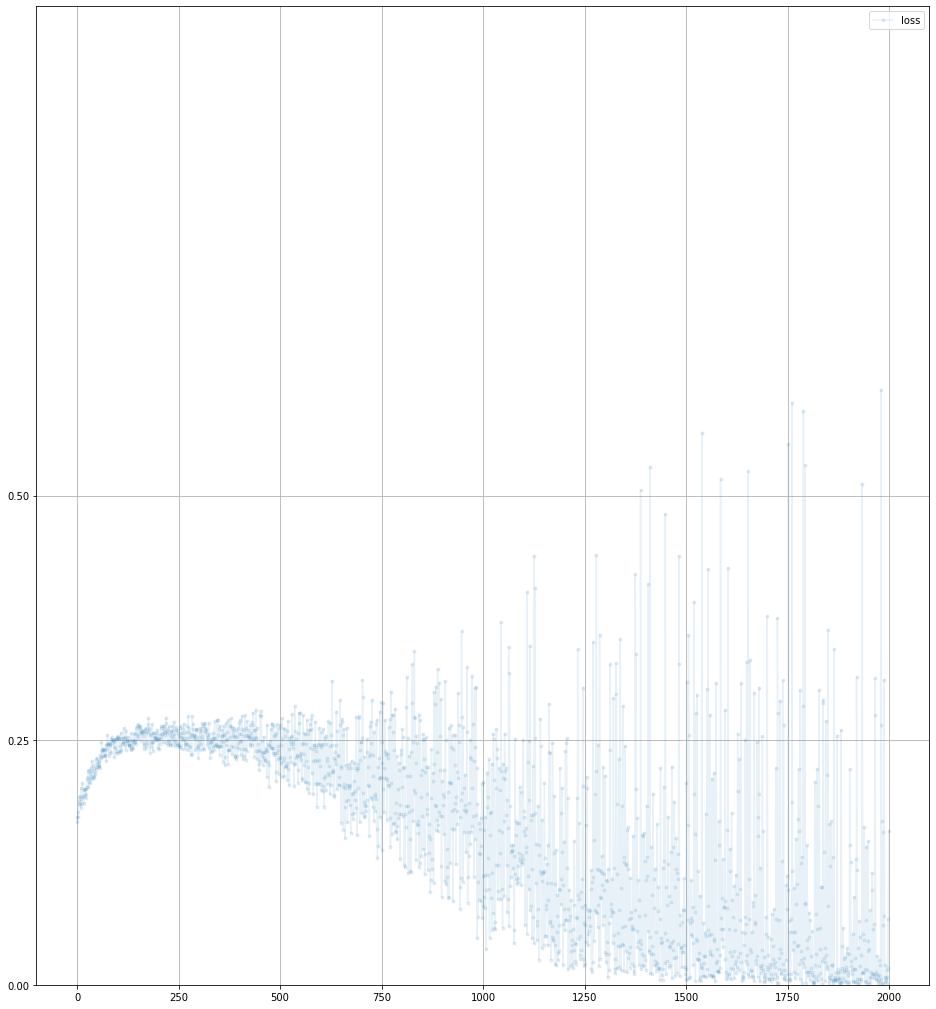

In [ ]:
D.plot_progress()

In [ ]:
print( D.forward( generate_real()).item())
print( D.forward( generate_random(4)).item())

0.8025246262550354
0.3689826428890228


In [ ]:
class Generator(nn.Module):

  def __init__(self):
    #파이토치 부모 클래스 초기화
    super().__init__()

    #신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(1,3),
        nn.Sigmoid(),
        nn.Linear(3,4),
        nn.Sigmoid()
    )


    #SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    #진행 측정을 위한 변수 초기화
    self.counter =0
    self.progress = []

    pass

  def forward(self, inputs):
    #모델 실행
    return self.model(inputs)

  def train(self, D, inputs, targets):
    #신경망 출력 계산
    g_output = self.forward(inputs)

    #판별기로 전달
    d_output = D.forward(g_output)

    #오차 계산
    loss = D. loss_function(d_output, targets)

    #카운트를 증가시키고 10회마다 오차 저장
    self.counter += 1
    if (self.counter%10 == 0):
      self.progress.append(loss.item())
      pass

    #기울기를 초기화하고 역전파 후 가중치 갱신
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,18), alpha=0.1, marker='.',
            grid=True, yticks=(0,0.25,0.5))
    pass



In [ ]:
#판별기 및 생성기 생성
D = Discriminator()
G = Generator()
image_list = []
#판별기 및 생성기 훈련
for i in range(10000):

  #1단계 : 참에 대해 판별기 훈련
  D.train(generate_real(), torch.FloatTensor([1.0]))

  #2단계 : 거짓에 대해 판별기 훈련
  #G의 기울기가 계싼되지 않도록 detach() 함수를 이용
  D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

  #3단계 : 생성기 훈련
  G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
  if( i % 1000 == 0):
    image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

  pass

count =  10000
count =  20000


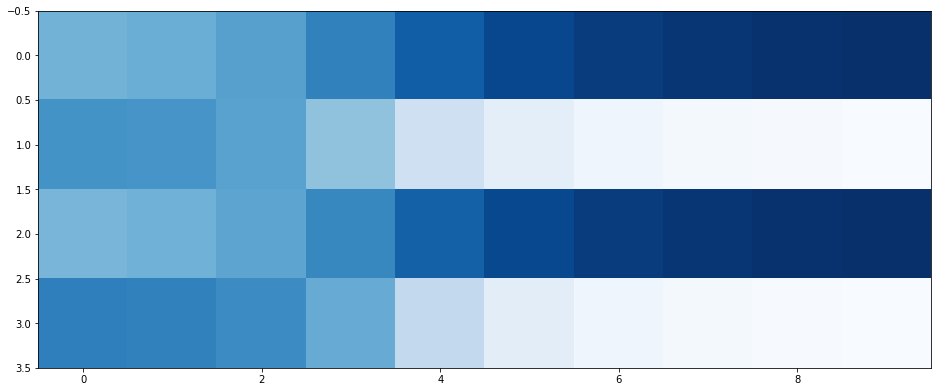

In [ ]:
import numpy as np
plt.figure(figsize = (16, 8))
plt.imshow(np.array(image_list).T, interpolation='none', cmap='Blues')

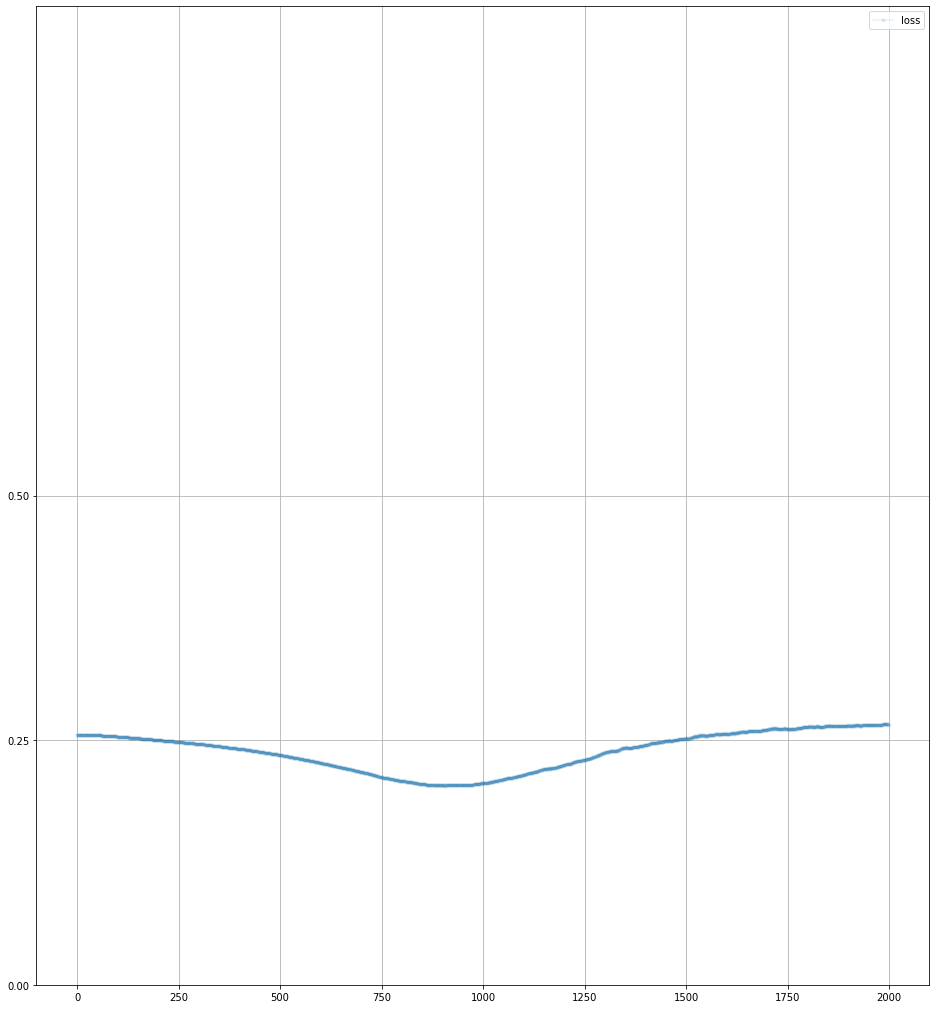

In [ ]:
D.plot_progress()

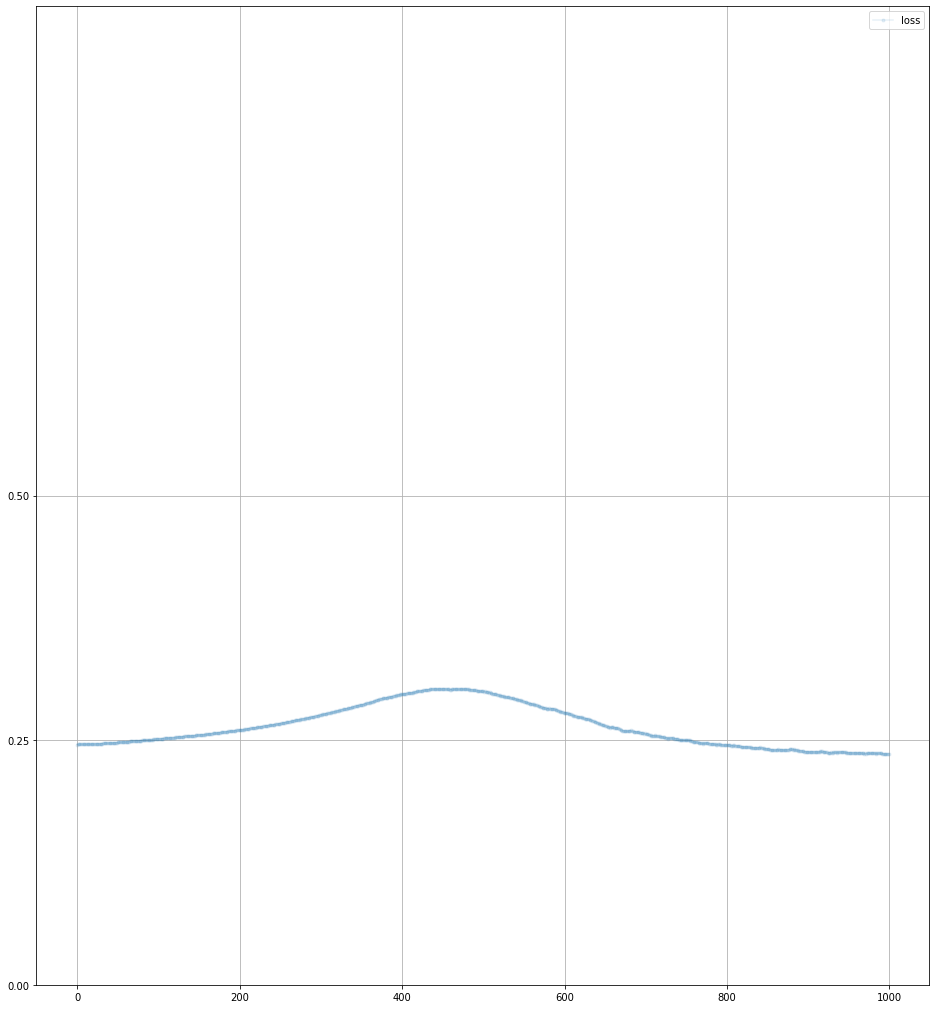

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9032, 0.0424, 0.9396, 0.0521], grad_fn=<SigmoidBackward>)